
# Exercise 2

Make a map of some Earthquake data superimposed on the global strain rate to show
how seismicity and strain rate coincide

**If you want to keep this map ... save it and download the image to your machine**

In [1]:
# First we import the modules we need

import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt

# The universal solvent for arrays (and hence images).
import numpy as np



## Read in the data


In [2]:
strainrate_extent=[-180,180,-68,80]
strainrate = np.loadtxt("../+Data/sec_invariant_strain_0.2.dat")
strainrate_data = strainrate.reshape(741,1800,3)  # I had to look at the data to work this out !

In [3]:
eq_events_by_year = np.load('../+Data/events_4.5+by_year_1970-2019.npy', allow_pickle=True).item()

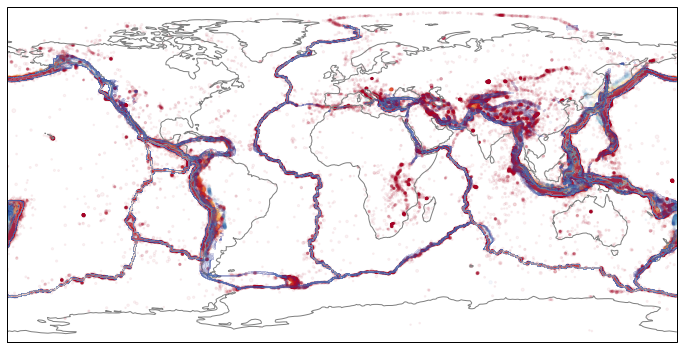

In [10]:
fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines(color="Gray")

## Try playing with zorder / alpha 

ax.contourf(strainrate_data[:,:,0], strainrate_data[:,:,1], strainrate_data[:,:,2], 
         levels=[20,30,40,50,60,70,80,90,100,300,500,1000], 
         transform=ccrs.PlateCarree(),  cmap=matplotlib.cm.RdYlBu_r, zorder=2, alpha=0.2, 
        extent=strainrate_extent)

for year in eq_events_by_year:
    eqs = eq_events_by_year[year]
    ax.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2], cmap=matplotlib.cm.RdYlBu, 
               s=(eqs[:,3]-4.0)*5.0, transform=ccrs.Geodetic(), alpha=0.05)
 


# plt.savefig("GlobalStrainRateEqMap.png", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()

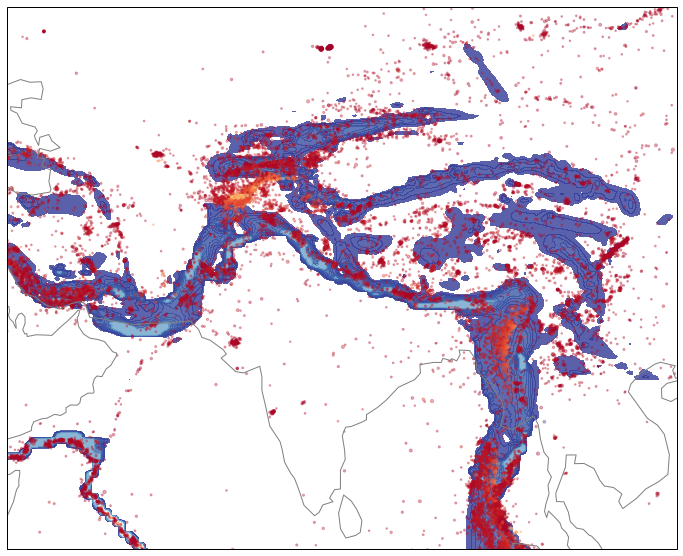

In [12]:
# Maybe a zoom in is more useful

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([50,110,5,50])
ax.coastlines(color="Gray")

ax.contourf(strainrate_data[:,:,0], strainrate_data[:,:,1], strainrate_data[:,:,2], 
         levels=[20,30,40,50,60,70,80,90,100,300,500,1000], 
         transform=ccrs.PlateCarree(),  cmap=matplotlib.cm.RdYlBu_r, zorder=0, alpha=0.8, 
        extent=strainrate_extent)

for year in eq_events_by_year:
    eqs = eq_events_by_year[year]
    ax.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2], cmap=matplotlib.cm.RdYlBu, 
               s=(eqs[:,3]-4.0)*5.0, transform=ccrs.Geodetic(), alpha=0.33)
 

# plt.savefig("GlobalStrainRateEqMap.png", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()




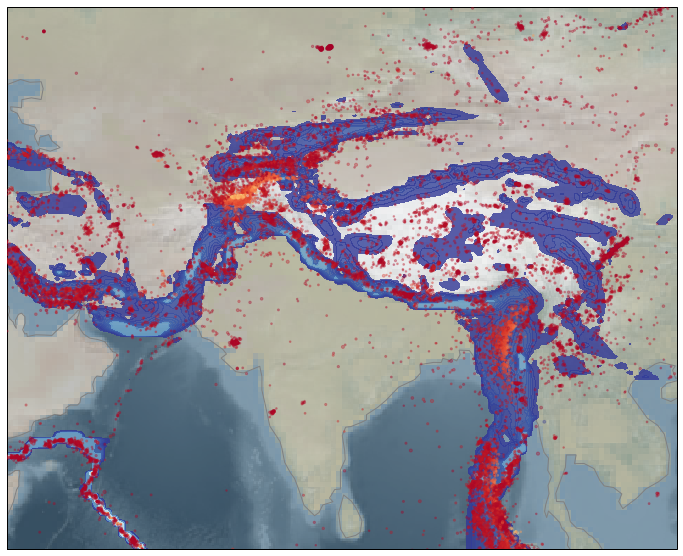

In [17]:
# Background image ?

import imageio
topography_imgfile = imageio.imread("../+Data/Etopo1_2400x1200.tif")

# Maybe a zoom in is more useful

fig = plt.figure(figsize=(12, 12), facecolor="none")
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([50,110,5,50])
ax.coastlines(color="Gray")


ax.stock_img()
ax.imshow(topography_imgfile, origin='upper', 
          transform=ccrs.PlateCarree(), 
          extent=[-180,180,-90,90],
          cmap=matplotlib.cm.gray, vmin=-5000, vmax=5000, alpha=0.5,
          zorder=1)

ax.contourf(strainrate_data[:,:,0], strainrate_data[:,:,1], strainrate_data[:,:,2], 
         levels=[20,30,40,50,60,70,80,90,100,300,500,1000], 
         transform=ccrs.PlateCarree(),  cmap=matplotlib.cm.RdYlBu_r, zorder=2, alpha=0.8, 
        extent=strainrate_extent)

for year in eq_events_by_year:
    eqs = eq_events_by_year[year]
    ax.scatter(eqs[:,0], eqs[:,1], c=eqs[:,2], cmap=matplotlib.cm.RdYlBu, 
               s=(eqs[:,3]-4.0)*5.0, transform=ccrs.Geodetic(), alpha=0.33, zorder=3)
 

# plt.savefig("IndianStrainRateEqMap.png", dpi=300, frameon=False, edgecolor="none", facecolor="none", bbox_inches='tight', pad_inches=0.0)
plt.show()



